In [1]:
import PyQt5
import monkdata as m
import dtree
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks")

## Assignment 0
Rank based on difficulty in making decision tree (Harder to easier):
1. MONK-2: High uncertainty, since it can fulfill the true requirement with any two attributes equal to 1.
2. MONK-3: It has more certainty compared to MONK-2 and MONK-1 (specific requirement from the attributes). But it has 5% of noise, so this makes it worse than MONK-1.
3. MONK-1: It has higher centrainty compared to MONK-2, but randomness is still higher compared to MONK-3 due to $(a_{1} = a_{2})$ specification

## Assignment 1

In [2]:
print('Entropy MONK-1: '+str(dtree.entropy(m.monk1)))
print('Entropy MONK-2: '+str(dtree.entropy(m.monk2)))
print('Entropy MONK-3: '+str(dtree.entropy(m.monk3)))

Entropy MONK-1: 1.0
Entropy MONK-2: 0.957117428264771
Entropy MONK-3: 0.9998061328047111


## Assignment 2
1. Entropy in uniform distribution is higher since it has same probability of each possibility, for example fair dice. Entropy for fair coin is 1
2. Entropy in non-uniform distribution is lower since it doesn't have same probability for different outcomes, for example, rigged coin (head 0.75, tail 0.25). Entropy is 0.81

## Assignment 3

In [3]:
temp=[dtree.averageGain(j,m.attributes[i]) for j in [m.monk1,m.monk2,m.monk3] for i in range(6)]
res={}
res['MONK-1']=temp[0:6]
res['MONK-2']=temp[6:12]
res['MONK-3']=temp[12:18]
res=pd.DataFrame.from_dict(res).T
res.columns=['$a_'+str(i+1)+'$' for i in range(6)]
res

,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$
MONK-1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
MONK-2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
MONK-3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


From the data above, $a_5$ seems to be the best attributes since it has the highest information gain for MONK-1 and MONK-2, and second highest in MONK-3. For MONK-3, $a_2$ is the highest.

## Assignment 4

When information gain is maximized, $entropy(S_k)$ is minimized. That means, we use information gain to select the attribute with lowest uncertainty.

## Assignment 5

In [4]:
train=[]
test=[]
t=dtree.buildTree(m.monk1,m.attributes)
train.append(1-dtree.check(t,m.monk1))
test.append(1-dtree.check(t,m.monk1test))
t=dtree.buildTree(m.monk2,m.attributes)
train.append(1-dtree.check(t,m.monk2))
test.append(1-dtree.check(t,m.monk2test))
t=dtree.buildTree(m.monk3,m.attributes)
train.append(1-dtree.check(t,m.monk3))
test.append(1-dtree.check(t,m.monk3test))
pd.DataFrame([train,test],columns=['MONK-1','MONK-2','MONK-3'],index=['$E_{train}$','$E_{test}$']).T

,$E_{train}$,$E_{test}$
MONK-1,0.0,0.171296
MONK-2,0.0,0.307870
MONK-3,0.0,0.055556


Assumption were not correct, MONK-3 has higher performance compared to MONK-1.

Error for training is 0 because of overfitting. This tree have a high error, beucase it's not general model (overfitted with our training)

## Assignment 6

Bias and variance is something that we have to consider as a trade-off when building a tree. When the tree has high complexity, it will give less bias, but more variance, vice versa. By pruning the tree, we remove overfitting tree nodes, that can result in less variance (but of course, increasing bias)

## Assignment 7

In [5]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]
def get_best(ds,f):
    t,v=partition(ds,f)
    tree=dtree.buildTree(t,m.attributes)
    perf=dtree.check(tree,v)
    pruned=dtree.allPruned(tree)
    for i in pruned:
        perf_temp=dtree.check(i,v)
        if perf_temp > perf:
            tree=i
            perf=perf_temp
    return tree
def check_error(f,train,test):
    error=[]
    std=[]
    for i in f:
        temp=[1-dtree.check(get_best(train,i),test) for j in range(100)]
        error.append(np.mean(temp))
        std.append(temp)
    return (error,std)

In [6]:
fraction=[0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [7]:
a,b=check_error(fraction,m.monk1,m.monk1test)
c,d=check_error(fraction,m.monk3,m.monk3test)

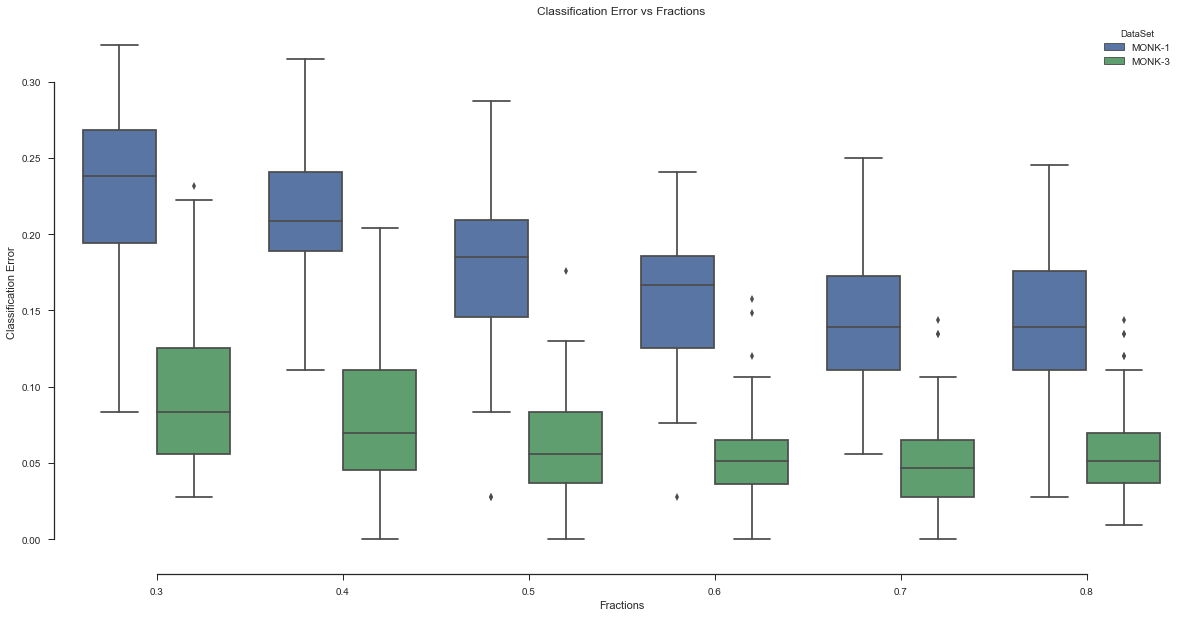

In [8]:
plt.figure(figsize=(20,10))
temp=pd.concat([pd.DataFrame(b),pd.DataFrame(d)])
temp['Fractions']=fraction*2
temp=temp.set_index('Fractions', append=True).stack().to_frame().reset_index().rename(columns={'level_2': 'DataSet', 0: 'Classification Error'}).drop('level_0', axis='columns')
temp['DataSet']=(['MONK-1']*100*len(fraction)+['MONK-3']*100*len(fraction))
sns.boxplot(x='Fractions', y='Classification Error', hue='DataSet', data=temp).set_title('Classification Error vs Fractions')
sns.despine(offset=10, trim=True)
plt.show()